<a href="https://colab.research.google.com/github/Ponch-byte98/Telecom-X_part2_Alura/blob/main/Alura_Telecom_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de datos

Forma original: (7267, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Columnas eliminadas: []
Forma tras eliminar columnas: (7267, 22)
Forma tras One-Hot Encoding: (7267, 7298)


,SeniorCitizen,tenure,Monthly,Total,Cuentas_Diarias,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,False,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporciones (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


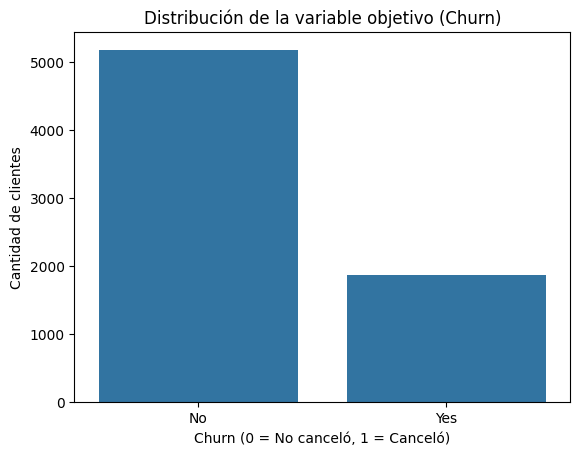

In [1]:
import pandas as pd

df = pd.read_csv("TelecomX_clean_data.csv")


print("Forma original:", df.shape)
display(df.head())

columnas_a_eliminar = ['customer_id', 'client_id', 'id']
columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df.columns]
df.drop(columns=columnas_a_eliminar, inplace=True)

print("Columnas eliminadas:", columnas_a_eliminar)
print("Forma tras eliminar columnas:", df.shape)


columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()


df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

print("Forma tras One-Hot Encoding:", df_encoded.shape)
display(df_encoded.head())

print(df['Churn'].value_counts())
print("\nProporciones (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Churn', data=df)
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Cantidad de clientes")
plt.show()

#Correlación y selección de variables y modelo predictivo

In [3]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Clientes en set de entrenamiento:", y_train.shape[0])
print("Clientes en set de prueba:", y_test.shape[0])
print("\nProporción de 'churn' en entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)
print("\nProporción de 'churn' en prueba:")
print(y_test.value_counts(normalize=True) * 100)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("Evaluación - Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Evaluación - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Clientes en set de entrenamiento: 5813
Clientes en set de prueba: 1454

Proporción de 'churn' en entrenamiento:
Churn_Yes
False    74.281782
True     25.718218
Name: proportion, dtype: float64

Proporción de 'churn' en prueba:
Churn_Yes
False    74.277854
True     25.722146
Name: proportion, dtype: float64
Evaluación - Regresión Logística
[[1040   40]
 [ 272  102]]
              precision    recall  f1-score   support

       False       0.79      0.96      0.87      1080
        True       0.72      0.27      0.40       374

    accuracy                           0.79      1454
   macro avg       0.76      0.62      0.63      1454
weighted avg       0.77      0.79      0.75      1454

Evaluación - Random Forest
[[990  90]
 [207 167]]
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1080
        True       0.65      0.45      0.53       374

    accuracy                           0.80      1454
   macro avg       0.74      0.68    

#Análisis de la Importancia de las Variables

Variables más influyentes según Regresión Logística:
                            Variable  Coeficiente  Importancia Absoluta
1                             tenure    -0.683236              0.683236
7277     InternetService_Fiber optic     0.505159              0.505159
3                              Total    -0.487425              0.487425
7295  PaymentMethod_Electronic check     0.432798              0.432798
7292               Contract_Two year    -0.422390              0.422390
7291               Contract_One year    -0.407888              0.407888
7286                 TechSupport_Yes    -0.363351              0.363351
7280              OnlineSecurity_Yes    -0.352740              0.352740
7293            PaperlessBilling_Yes     0.284613              0.284613
7282                OnlineBackup_Yes    -0.234159              0.234159


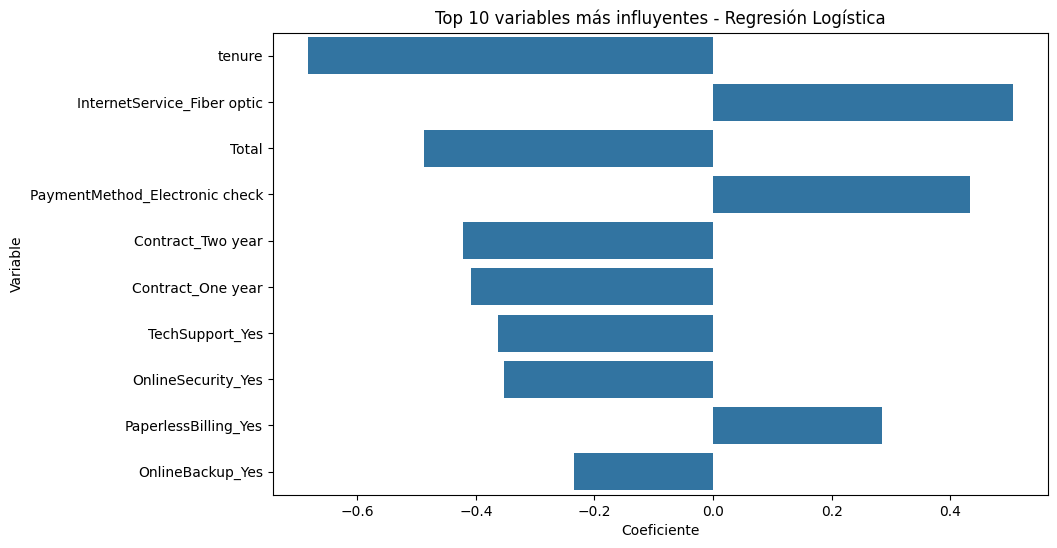

Variables más importantes según Random Forest:
                            Variable  Importancia
3                              Total     0.094941
1                             tenure     0.086739
2                            Monthly     0.072626
4                    Cuentas_Diarias     0.071223
7295  PaymentMethod_Electronic check     0.023663
7277     InternetService_Fiber optic     0.023622
7292               Contract_Two year     0.023159
7280              OnlineSecurity_Yes     0.018794
7286                 TechSupport_Yes     0.017396
7293            PaperlessBilling_Yes     0.016635


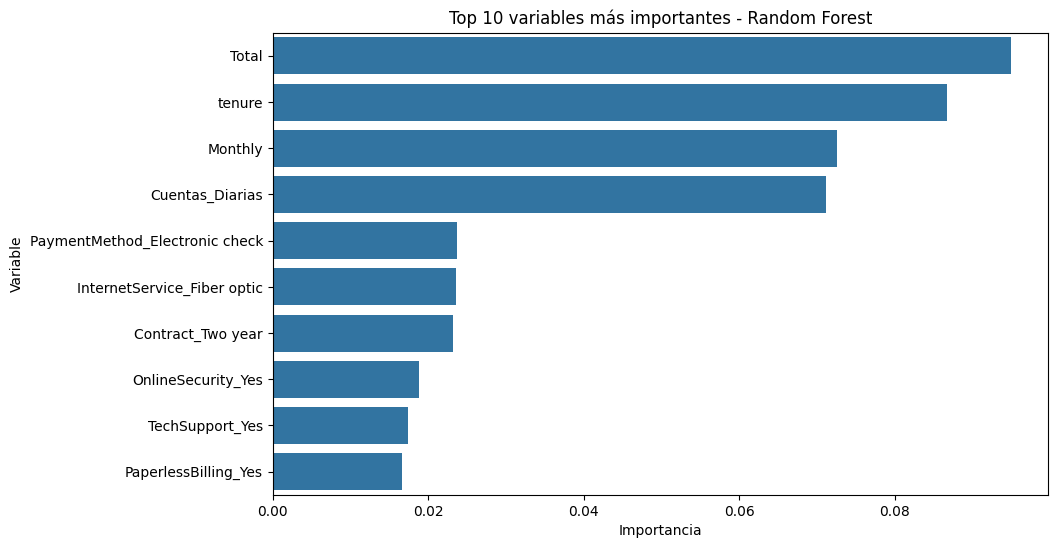

In [4]:
import pandas as pd
import numpy as np

feature_names = X.columns
coeficientes = logreg.coef_[0]

importancia_logreg = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
})
importancia_logreg['Importancia Absoluta'] = importancia_logreg['Coeficiente'].abs()
importancia_logreg = importancia_logreg.sort_values(by='Importancia Absoluta', ascending=False)
print("Variables más influyentes según Regresión Logística:")
print(importancia_logreg.head(10))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=importancia_logreg.head(10))
plt.title("Top 10 variables más influyentes - Regresión Logística")
plt.show()

importancia_rf = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': rf.feature_importances_
})
importancia_rf = importancia_rf.sort_values(by='Importancia', ascending=False)

print("Variables más importantes según Random Forest:")
print(importancia_rf.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(10))
plt.title("Top 10 variables más importantes - Random Forest")
plt.show()